In [1]:
import pandas as pd
# Setting up inline plotting using jupyter notebook "magic"
# %matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
# Read below thread for plotting guides
# https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

In [2]:
# df = pd.read_csv('data.txt', header=None)
# x_mean, y_mean = df.mean()
# print(x, y)
# df[2] = df[0] - x_mean  # mean value difference: subtract mean from all input values of training set
# df[3] = df[1] - y_mean  # mean value difference: subtract mean from all output values of training set
# df[4] = df[2] ** 2  # square of mean value difference
# df[5] = df[2] * df[3]
# beta = sum(df[5])/ sum(df[4])
# alpha = y_mean - beta*x_mean
# print(alpha, beta)

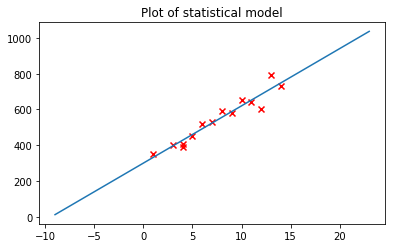

In [3]:
class StatasticalRegression(object):
    def __init__(self, dataframe_path="data.txt"):
        self.dataframe = pd.read_csv(dataframe_path, header=None)
        self.alpha, self.beta = None, None
    
    def compute_constant(self):
        x_mean, y_mean = self.dataframe.mean()
#         print("Mean X: {}\nMean Y: {}".format(x_mean, y_mean))
        self.dataframe['input_diff'] = self.dataframe[0] - x_mean  # mean value difference: subtract mean from all input values of training set
        self.dataframe['output_diff'] = self.dataframe[1] - y_mean  # mean value difference: subtract mean from all output values of training set
        self.dataframe['sqrd_input_diff'] = self.dataframe.input_diff ** 2  # square of mean value difference
        self.dataframe['mul_input_output_diff'] = self.dataframe.input_diff * self.dataframe.output_diff
#         print("Result: \n{}".format(self.dataframe))
        self.beta = sum(self.dataframe.mul_input_output_diff)/ sum(self.dataframe.sqrd_input_diff)
        self.alpha = y_mean - self.beta*x_mean
        return self.alpha, self.beta
    
    def hypothesis(self, feature, alpha=None, beta=None):
        if not (alpha and beta):
            alpha, beta = self.compute_constant()
        return (alpha + beta*feature)
    
    def add_predicted_values(self):
        self.dataframe['prediction'] = self.hypothesis(self.dataframe[0], alpha, beta)
    
    def draw_accuracy_plot(self):
        fig = plt.figure().add_axes((0.1, 0.2, 0.8, 0.7))
        x = range(min(self.dataframe[0]) - 10, max(self.dataframe[0]) + 10)
        fig.plot(x, [self.hypothesis(i, alpha, beta) for i in x])
        fig.scatter(self.dataframe[0], self.dataframe[1], marker='x', c="red")
        fig.set_title("Plot of statistical model")

s = StatasticalRegression()
alpha, beta = s.compute_constant()
s.add_predicted_values()
s.draw_accuracy_plot()

In [4]:
# dataframe = pd.read_csv("data.csv")
# actual_output = dataframe['y']  # y
# dataframe = dataframe.drop(['y'], axis=1)  # X (without bias)
# # add bias value
# dataframe.insert(0, 'bias', 1)  # add bias value x_0  as a result (X with bias)

# # set up initial values
# initial_theta = np.array([300,30])  # set initial value of theta to 1,1
# learning_rate = 0.5  # set learning rate alpha


# hypothesis = dataframe.dot(initial_theta)  # alternative of (dataframe * initial_theta).sum(axis=1)
# traing_set_length = len(actual_output)  # n -- number of training set

# sqrErrors = (hypothesis - actual_output) ** 2  # mean squared error
# cost = (1/2*traing_set_length) * sum(sqrErrors)  # calculated cost
# cost

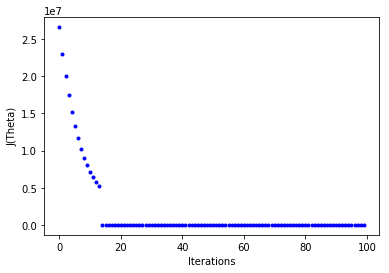

In [5]:
class LinearRegression(object):
    def __init__(self, dataframe_path="data.csv", initial_theta=np.array([1,1]), learning_rate=0.1):
        self.df = pd.read_csv(dataframe_path)
        self.dataframe = pd.read_csv(dataframe_path)  # import directory
        self.actual_output = self.dataframe['y']  
        self.dataframe['bias'] = 1  # add bias value x_0
        self.dataframe = self.dataframe.drop(['y'], axis=1)
        self.theta = initial_theta
        self.learning_rate = learning_rate
        self.hypothesis = None
        self.traing_set_length = len(self.actual_output)    
    
    def hypothesis(self, feature_matrix, theta):
        return feature_matrix.dot(theta)
        
    def compute_cost(self, theta):
        sqrErrors = (self.dataframe.dot(theta) - self.actual_output) ** 2
        cost = (1/2*self.traing_set_length) * sum(sqrErrors)
        return cost

    def gradient_descent(self, theta, no_of_iterations=1000):
        cost_history = np.zeros(no_of_iterations)
        theta_history = np.zeros((no_of_iterations, 2))
        
        for i in range(self.traing_set_length):
            # prediction = self.hypothesis(self.dataframe, theta)
            prediction = self.dataframe.dot(theta)
            theta = theta - (1/self.traing_set_length) * self.learning_rate * ( self.dataframe.T.dot((prediction - self.actual_output)))
            theta_history[i,:] = theta.T
            cost_history[i]  = self.compute_cost(theta)
        
        return theta, cost_history, theta_history 
    
    def draw_accuracy_plot(self):
        fig = plt.figure().add_axes((0.1, 0.2, 0.8, 0.7))
        x = range(min(self.dataframe[0]) - 10, max(self.dataframe[0]) + 10)
#         fig.plot(x, [self.hypothesis(i, alpha, beta) for i in x])
        fig.scatter(self.dataframe[0], self.actual_output['y'], marker='x', c="red")
        fig.set_title("Plot of statistical model")

l = LinearRegression(learning_rate=0.001)
no_of_iterations = 10**2
theta, costs, thetas = l.gradient_descent(theta=np.array((0, 0)), no_of_iterations=no_of_iterations)

fig,ax = plt.subplots()  # optional parameter figsize=(12,8)
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
jThetaPlot=ax.plot(range(no_of_iterations), costs[:no_of_iterations], 'b.')

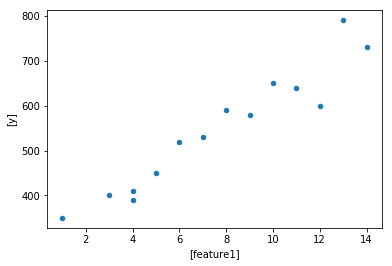

In [6]:
l.df.plot.scatter(x=['feature1'], y=['y'])